In [1]:
using DrWatson
@quickactivate projectdir()

using StatsPlots
using StatsBase, GLM
using Random: seed!
using CSV, DataFrames, Chain

theme(:default, grid=false, tickdir=:out, label=false)

In [2]:
ddir = datadir("exp_raw", "BBConsortia") 
pdir = plotsdir("BBConsortia_bootstrap_test") |> mkpath

"/Users/bend/projects/Doran_etal_2022/plots/BBConsortia_bootstrap_test"

In [4]:
pltdf = CSV.read(joinpath(ddir, "merged_consortia-and-isolate_plotdata.csv"), DataFrame)

Row,con_id,con_list,msk_id,butyrate_mean,acetate_mean,propionate_mean,succinate_mean,butyrate_std,acetate_std,propionate_std,succinate_std,Acetate_mean,Butyrate_mean,Propionate_mean,Succinate_mean,Acetate_std,Butyrate_std,Propionate_std,Succinate_std,name,seq_id,need_oggs,species_in_strvar,genus_in_strvar
,String7,String31,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String31,String15,Bool,Int64,Int64
1,CON.084,"DFI.1.234,DFI.2.45,DFI.3.84",DFI.3.84,4.55624,2.79497,-0.29222,0.0259156,0.876702,0.217815,0.433933,0.0582666,1.54362,5.67077,-0.233056,-0.767597,0.0227796,0.023164,0.0033514,0.0102699,Coprococcus comes,210702-DFI.3.84,false,1,1
2,CON.085,"DFI.1.234,DFI.2.45,DFI.6.78",DFI.6.78,5.62454,2.3551,0.278347,0.123691,0.443752,0.395852,0.0803643,0.0760432,3.4311,-0.259368,-0.198647,2.36344,0.450883,0.0615645,0.10864,0.827305,Anaerobutyricum soehngenii,211108-DFI.6.78,true,0,0
3,CON.086,"DFI.1.234,DFI.2.45,DFI.4.30",DFI.4.30,6.14297,0.931719,2.36774,-0.0618057,0.365015,0.740421,0.444337,0.0807273,-1.13629,5.06859,1.97317,-0.951255,0.634897,2.18694,1.00431,0.356204,Anaerostipes hadrus,210702-DFI.4.30,false,1,1
4,CON.087,"DFI.1.19,DFI.1.234,DFI.2.45",DFI.1.19,6.72225,1.59332,0.940054,-0.0210095,0.0682819,0.222954,0.0622343,0.080052,-0.34663,2.77478,1.22566,-0.715933,0.280964,3.48805,1.1707,0.0861858,Anaerostipes caccae,210509-DFI.1.19,false,0,1
5,CON.088,"DFI.1.234,DFI.2.45,DFI.5.28",DFI.5.28,3.23979,2.1665,-0.00734626,-0.0386782,1.00149,0.140506,0.484648,0.028282,0.483262,5.83235,0.0296897,0.735292,0.0546448,0.0586041,0.0512032,0.159343,[Eubacterium] rectale,210928-DFI.5.28,true,1,1
6,CON.089,"DFI.1.234,DFI.2.45,MSK.6.3",MSK.6.3,4.79528,1.96362,-0.0682856,0.00460516,0.229041,0.0417746,0.808534,0.0147493,0.504984,5.73143,0.0837137,0.70721,0.225006,0.0156853,0.0703886,0.119016,Roseburia faecis,TM222,false,0,0
7,CON.090,"DFI.1.234,DFI.2.45,DFI.5.40",DFI.5.40,3.20835,2.72607,-0.305818,0.0441199,1.85737,0.552205,0.423246,0.10503,2.91898,-0.205279,0.774899,0.642797,0.0117857,0.0103657,0.0702255,0.0339985,Faecalibacterium prausnitzii,210226-DFI.5.40,true,0,0
8,CON.091,"DFI.1.234,DFI.2.45,MSK.11.20",MSK.11.20,5.22634,2.54555,-0.0362934,-0.0199167,0.00795979,0.0779558,0.0956845,0.0100014,-0.419323,6.70012,3.10775,-0.594025,0.22129,0.0468537,0.915711,0.0653226,Anaerostipes hadrus,TM456,false,1,1
9,CON.092,"DFI.1.234,DFI.2.45,DFI.5.64",DFI.5.64,6.88241,3.44515,0.467723,0.112728,0.332509,0.369505,0.22223,0.26109,2.96728,-0.21137,0.315291,0.501136,0.0136715,0.0121592,0.0719658,0.0703298,[Clostridium] symbiosum,210702-DFI.5.64,false,0,0


In [5]:
model_notinstrvar = lm(@formula(acetate_mean ~ Acetate_mean), filter(:genus_in_strvar => ==(0), pltdf))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

acetate_mean ~ 1 + Acetate_mean

Coefficients:
────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)   2.15992     0.450676  4.79    0.0020   1.09424    3.2256
Acetate_mean  0.141305    0.180123  0.78    0.4585  -0.284619   0.567229
────────────────────────────────────────────────────────────────────────

In [6]:
model_instrvar = lm(@formula(acetate_mean ~ Acetate_mean), filter(:genus_in_strvar => ==(1), pltdf))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

acetate_mean ~ 1 + Acetate_mean

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   1.92804     0.15653   12.32    <1e-04  1.54503     2.31105
Acetate_mean  0.387611    0.118693   3.27    0.0171  0.0971794   0.678042
─────────────────────────────────────────────────────────────────────────

In [9]:
adjr2(model_instrvar), adjr2(model_notinstrvar)

(0.5799458753272186, -0.050499538652620135)

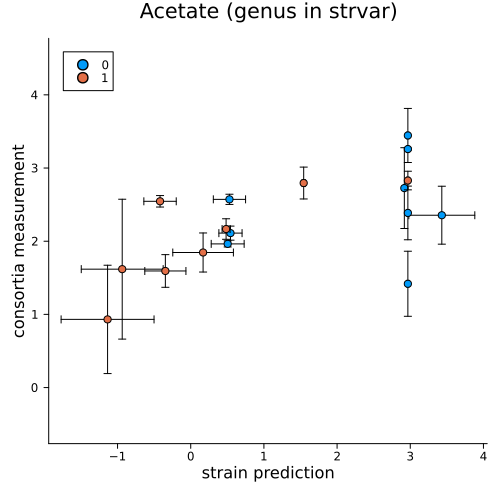

In [99]:
p1 = plot(title="Acetate (genus in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    size=(500,500)
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df pltdf scatter!(
    :Acetate_mean, :acetate_mean, 
    group=:genus_in_strvar,
    xerror=:Acetate_std, yerror=:acetate_std,
    )

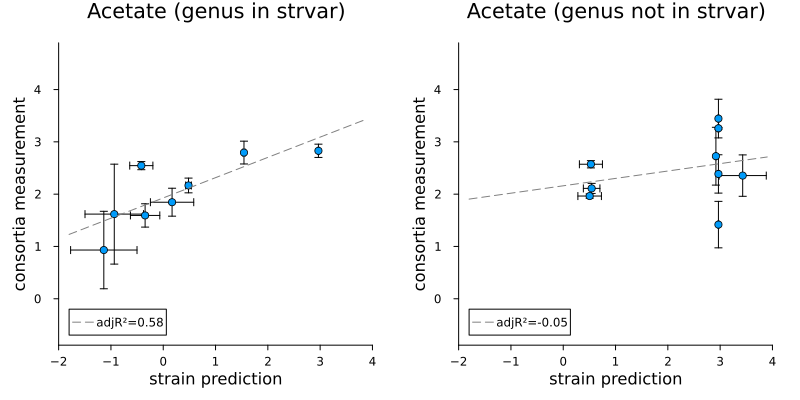

In [8]:
p1 = plot(title="Acetate (genus in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
# @df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
#     :Acetate_mean, :acetate_mean, 
#     xerror=:Acetate_std, yerror=:acetate_std,
#     c=:grey, alpha=0.1
# )
plot!(x->predict(model_instrvar, [(;Acetate_mean=x)])[1],-1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_instrvar), digits=2))",
)  

p2 = plot(title="Acetate (genus not in strvar)", 
    xlabel="strain prediction",
    ylabel="consortia measurement",
    alpha=.5, 
    ratio=1,
    # size=(600,600),
    # legendtitle="genus in strvar",
    # legendcolumns=2,
    # legend=:outertop
)
@df filter(:genus_in_strvar => ==(0), pltdf) scatter!(
    :Acetate_mean, :acetate_mean, 
    xerror=:Acetate_std, yerror=:acetate_std,
)
# @df filter(:genus_in_strvar => ==(1), pltdf) scatter!(
#     :Acetate_mean, :acetate_mean, 
#     xerror=:Acetate_std, yerror=:acetate_std,
#     c=:grey, alpha=0.1
# )
plot!(x->predict(model_notinstrvar, [(;Acetate_mean=x)])[1], -1.8, 3.9,
    c=:grey, linestyle=:dash,
    label="adjR²=$(round(adjr2(model_notinstrvar), digits=2))",
)
plot(p1, p2, 
    layout=grid(1,2), 
    legend=:bottomleft, size=(800,400),
    margin=5Plots.mm,
    xlims=(-2, 4),
    link=:y
    )  

In [12]:
srcdf = pltdf |> 
    df->select(df, 
        :con_id,
        :msk_id,
        :genus_in_strvar,
        :Acetate_mean => :strain_acetate_mean,
        :Acetate_std => :strain_acetate_std,
        :acetate_mean => :consortia_acetate_mean,
        :acetate_std => :consortia_acetate_std,
    )

Row,con_id,msk_id,genus_in_strvar,strain_acetate_mean,strain_acetate_std,consortia_acetate_mean,consortia_acetate_std
,String7,String15,Int64,Float64,Float64,Float64,Float64
1,CON.084,DFI.3.84,1,1.54362,0.0227796,2.79497,0.217815
2,CON.085,DFI.6.78,0,3.4311,0.450883,2.3551,0.395852
3,CON.086,DFI.4.30,1,-1.13629,0.634897,0.931719,0.740421
4,CON.087,DFI.1.19,1,-0.34663,0.280964,1.59332,0.222954
5,CON.088,DFI.5.28,1,0.483262,0.0546448,2.1665,0.140506
6,CON.089,MSK.6.3,0,0.504984,0.225006,1.96362,0.0417746
7,CON.090,DFI.5.40,0,2.91898,0.0117857,2.72607,0.552205
8,CON.091,MSK.11.20,1,-0.419323,0.22129,2.54555,0.0779558
9,CON.092,DFI.5.64,0,2.96728,0.0136715,3.44515,0.369505


In [25]:
x = srcdf.strain_acetate_mean
y = srcdf.consortia_acetate_mean;
instrvar = srcdf.genus_in_strvar .== 1;

In [94]:
mtst = lm([ones(length(x)) x Int.(instrvar)], y)

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
────────────────────────────────────────────────────────────────
        Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────
x1  1.88445      0.306192  6.15    <1e-04   1.22773     2.54116
x2  0.266542     0.110122  2.42    0.0297   0.0303541   0.50273
x3  0.0787715    0.344589  0.23    0.8225  -0.660297    0.817841
────────────────────────────────────────────────────────────────


In [ ]:
mtst = lm([ones(length(x)) x Int.(instrvar)], y)

In [30]:
m0 = lm([ones(length(x[instrvar])) x[instrvar]], y[instrvar])

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
x1  1.92804     0.15653   12.32    <1e-04  1.54503     2.31105
x2  0.387611    0.118693   3.27    0.0171  0.0971794   0.678042
───────────────────────────────────────────────────────────────


In [36]:
m0.rr |> typeof |> fieldnames

(:mu, :offset, :wts, :y)

In [60]:
slope_notinstrvar = coef(model_notinstrvar)[2]
slope_instrvar = coef(model_instrvar)[2]
chosenslopes = [slope_notinstrvar, slope_instrvar]

2-element Vector{Float64}:
 0.14130493030487176
 0.38761090031215223

In [70]:
adjr2_notinstrvar = adjr2(model_notinstrvar)
adjr2_instrvar = adjr2(model_instrvar)
chosenadjr2s = [adjr2_notinstrvar, adjr2_instrvar]

2-element Vector{Float64}:
 -0.050499538652620135
  0.5799458753272186

In [89]:
bootdf = map(1:1000) do i
    mask = rand([true, false], length(x))
    m1 = lm([ones(length(x[mask])) x[mask]], y[mask])
    m2 = lm([ones(length(x[.!mask])) x[.!mask]], y[.!mask])
    (;slope_1=coef(m1)[2], slope_2=coef(m2)[2], adjr2_1=adjr2(m1), adjr2_2=adjr2(m2))
end |> DataFrame;

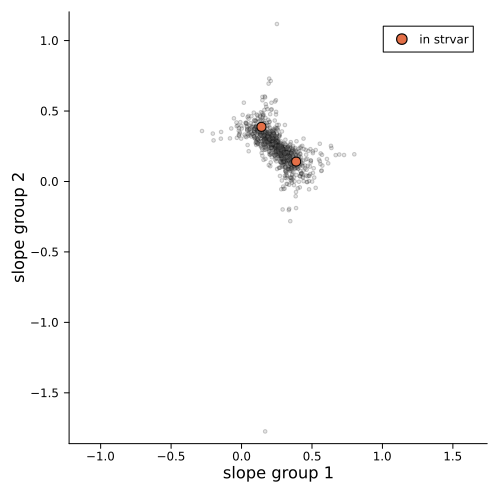

In [101]:
plot(xlabel="slope group 1", ylabel="slope group 2", 
    size=(500,500),   
    ratio=1, 
)
@df bootdf scatter!(:slope_1, :slope_2, 
    c=:grey, alpha=.2,
    markersize=2,
)
scatter!(chosenslopes, reverse(chosenslopes),
    markersize=5,
    label="in strvar"
)
# plot!(circle(norm(chosenslopes)), alpha=.1)

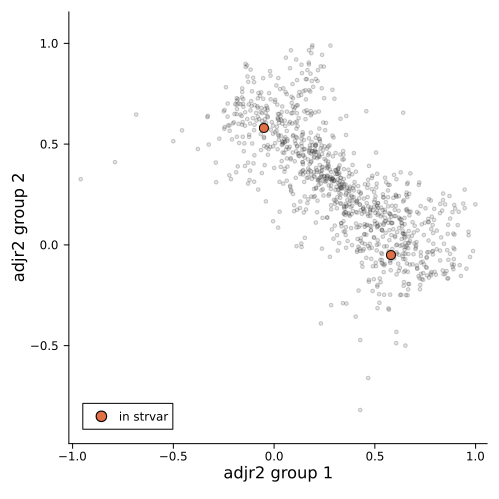

In [100]:
plot(xlabel="adjr2 group 1", ylabel="adjr2 group 2", 
    size=(500,500),   
    ratio=1, 
)
@df bootdf scatter!(:adjr2_1, :adjr2_2, 
    c=:grey, alpha=.2,
    markersize=2,
)
scatter!(chosenadjr2s, reverse(chosenadjr2s),
    markersize=5,
    label="in strvar"
)
# plot!(circle(norm(chosenadjr2s)), alpha=.1)

In [76]:
using LinearAlgebra: norm

In [83]:
circle(r) = Plots.Shape([(r * cos(i), r * sin(i)) for i in LinRange(0, 2π, 100)])

circle (generic function with 1 method)

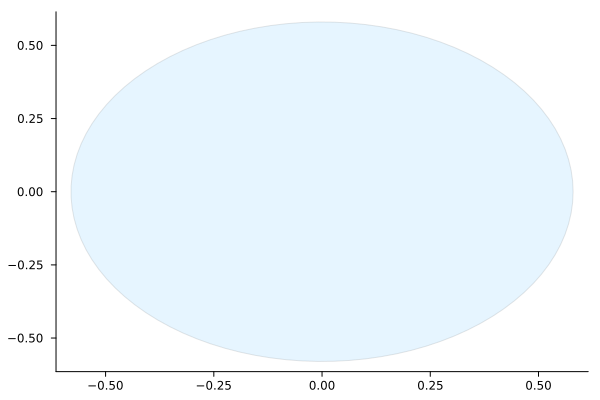

In [85]:
plot(circle(.58), alpha=.1)

0.5821403797308526